<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/geoespatial_data/graficos/graficos_e_mapas_contextily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos, Mapas e Contextily

Quando temos dados geoespaciais é sempre interessante mostrá-los sobre mapas. Por exemplo, mostrar a localização das cidades de um estado sobre o mapa do estado. Há várias bibliotecas que podem ser utilizadas para isto e uma delas é a contextily. Sua utilização é bem simples.

Vamos utilizar um conjunto de dados do sklearn para fazer um exemplo.

# Bibliotecas

In [1]:
!pip3 install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import contextily as cx

import matplotlib.pyplot as plt

# Dados

Vamos utilizar os dados California Housing do sklearn [1].

In [3]:
from sklearn.datasets import fetch_california_housing

# com as_frame=True X dataset.data é um dataframe já com as colunas nomeadas apropriadamente
dataset = fetch_california_housing(as_frame=True) 
X = dataset.data

Observando as primeiras linhas do nossos dados vemos que temos dados de Latitude, Longitude, população entre outros.

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


É simples mostrar a localização com um gráfico do matplotlib. 

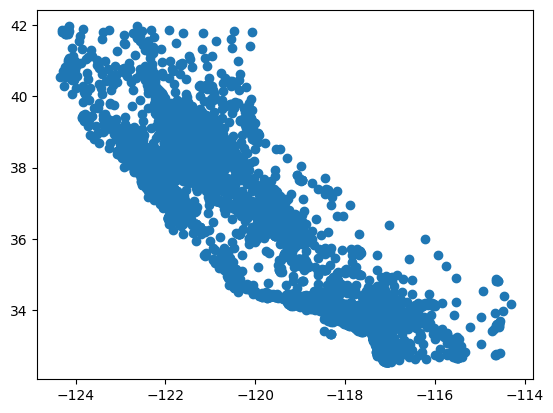

In [5]:
plt.scatter(X.Longitude,X.Latitude)

Mas mostrar estas informações sobre um mapa é pode trazer informações importantes. Por exemplo, a maior parte das cidades está concentrada perto do litoral?

Na figura abaixo, utilizamos o parâmetro alpha, reduzimos o tamanho dos pontos e adicionamos o mapa. É necessário utilizar o parâmetro crs (Coordinate Reference System) pois nossos dados estão em latitude e longitude.

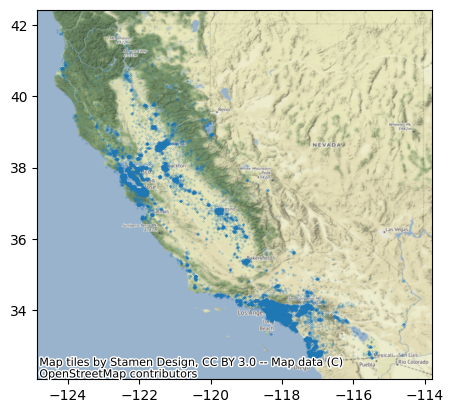

In [6]:
fig, ax = plt.subplots()
ax.scatter(X.Longitude,X.Latitude,
            s=0.1,
            alpha=0.5)

cx.add_basemap(ax, crs='EPSG:4326')

Com o parâmetro source é fácil mudar o background, pois existem vários providers.
No gráfico abaixo também trocamos a cor dos pontos e retiramos os eixos.

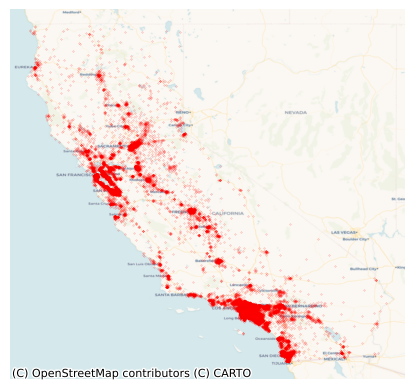

In [7]:
fig, ax = plt.subplots()
ax.scatter(X.Longitude,X.Latitude,
           s=0.05,
           alpha=0.5,
           c='red')

cx.add_basemap(ax,
               crs='EPSG:4326',
               source=cx.providers.CartoDB.Voyager)
# Remove the box, ticks and labels
ax.set_axis_off()

Nas referências [3] e [4] encontramos outros exemplos de gráfico deste tipo, utilizando uma figura .png e o outro o basemap respectivamente. A referência [4] também utiliza uma legenda personalizada para o tamanho dos pontos.

[1] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

[2] https://contextily.readthedocs.io/en/latest/intro_guide.html

[3] https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=_7A3wcv7jYiZ (Visualizing Geographical Data)

[4] https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html (Example: California Cities)